In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

### Example 1

In [2]:
df = pd.read_csv('AirPassenger.csv')

In [3]:
df.dtypes

Year-Month    object
Pax            int64
dtype: object

### We want 'Year-Month' as datetime. We can do this directly when using 'read_csv' 

In [4]:
df = pd.read_csv('AirPassenger.csv', parse_dates=['Year-Month'])

In [5]:
df.head()

,Year-Month,Pax
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [6]:
df.dtypes

Year-Month    datetime64[ns]
Pax                    int64
dtype: object

### When working with time series, it is recommended to set dates as index. This can also be done directly in read_csv.

In [7]:
df = pd.read_csv('AirPassenger.csv', parse_dates=['Year-Month'], index_col='Year-Month')

In [8]:
df.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


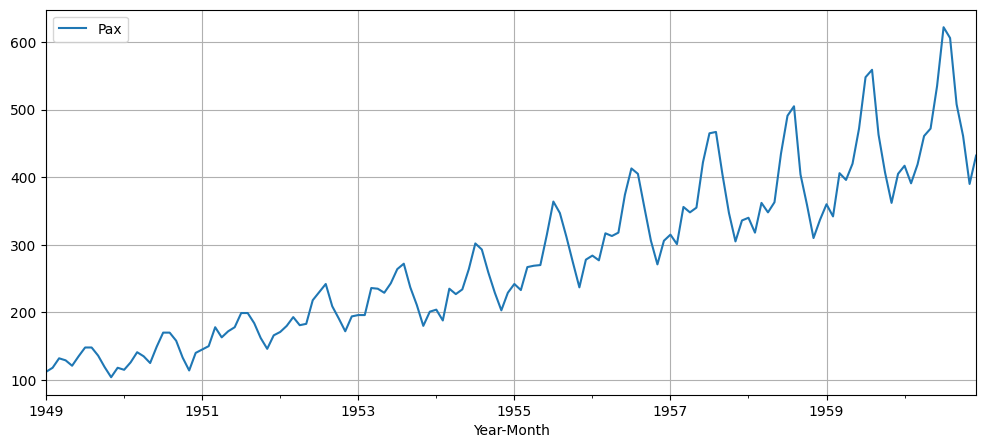

In [9]:
df.plot(figsize=(12,5), grid=True)
plt.show()

### We can see an increasing trend and seasonality also increasing in size.

## Decompositions

### Moving Average Addition

In [10]:
# Decomposing the timeseries additive
df_add_decompose = seasonal_decompose(df, model='additive', period=12)

<Figure size 1000x600 with 0 Axes>

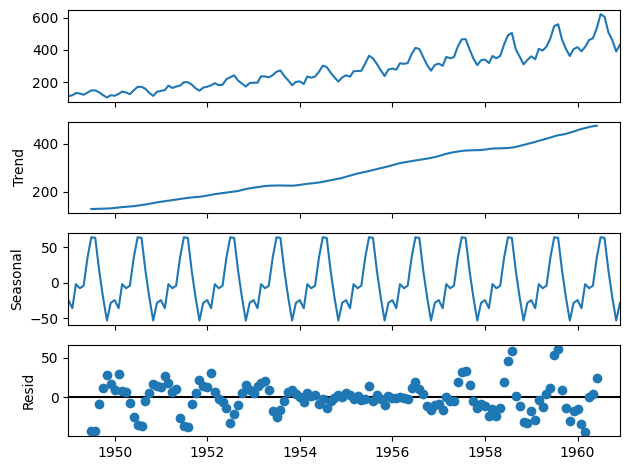

In [11]:
plt.figure(figsize=(10,6))
df_add_decompose.plot()
plt.show()

In [12]:
# Decomposing the timeseries multiplicative
df_multiply_decompose = seasonal_decompose(df, model='multiplicative', period=12)

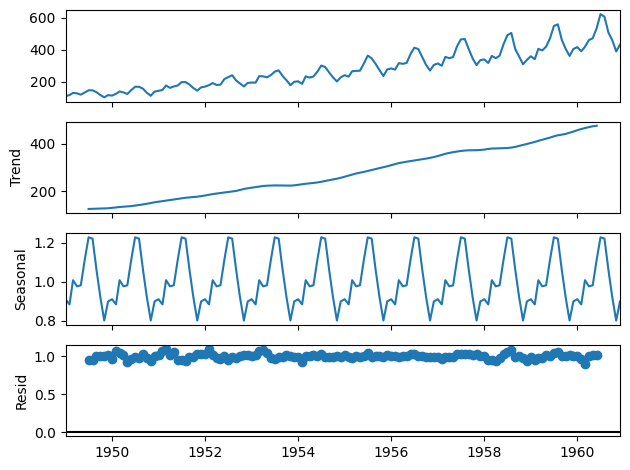

In [13]:
df_multiply_decompose.plot()
plt.show()

### Let's do a log transfromation and see the trends and seasonality.

In [14]:
df_log = df.copy()

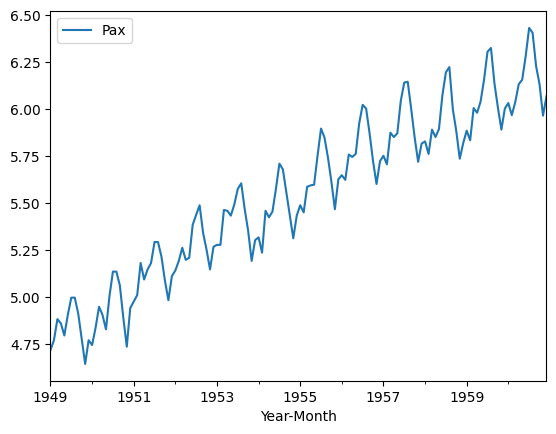

In [15]:
df_log['Pax'] = np.log(df['Pax'])
df_log.plot()
plt.show()

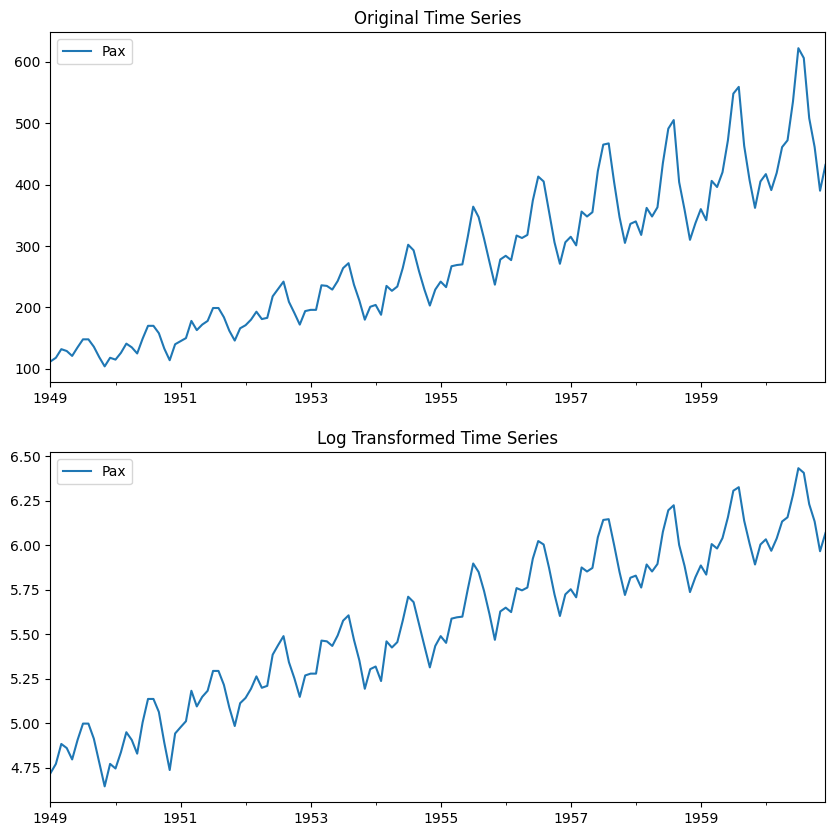

In [16]:
# Comparing the original time series with log transformed
fig,ax = plt.subplots(2,1,figsize=(10,10))

df.plot(ax=ax[0], xlabel='')
df_log.plot(ax=ax[1], xlabel='')
ax[0].set_title('Original Time Series')
ax[1].set_title('Log Transformed Time Series')
plt.show()

### Example 2

In [17]:
df1 = pd.read_csv('daily-total-female-births.csv', parse_dates=['Date'], index_col='Date')
df1.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


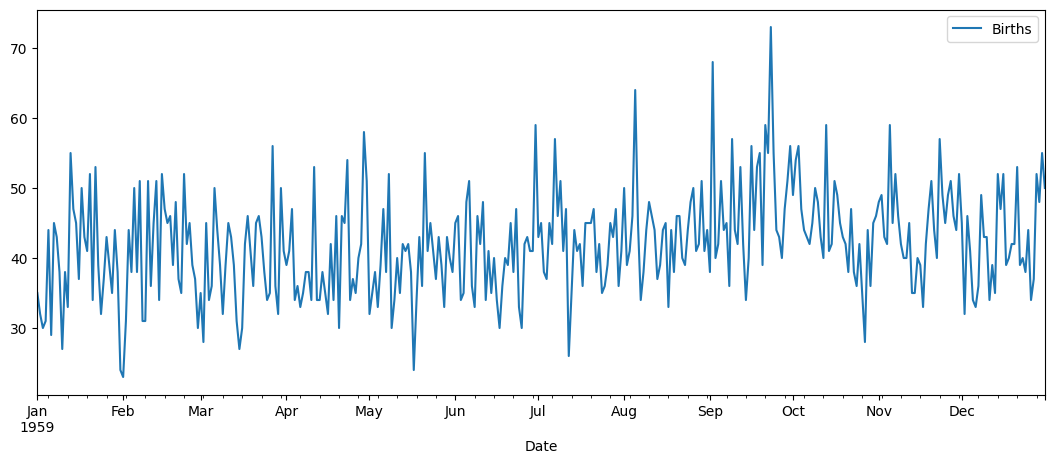

In [18]:
df1.plot(figsize=(13,5))
plt.show()

### Doesn't show very clear trend and seasonality.

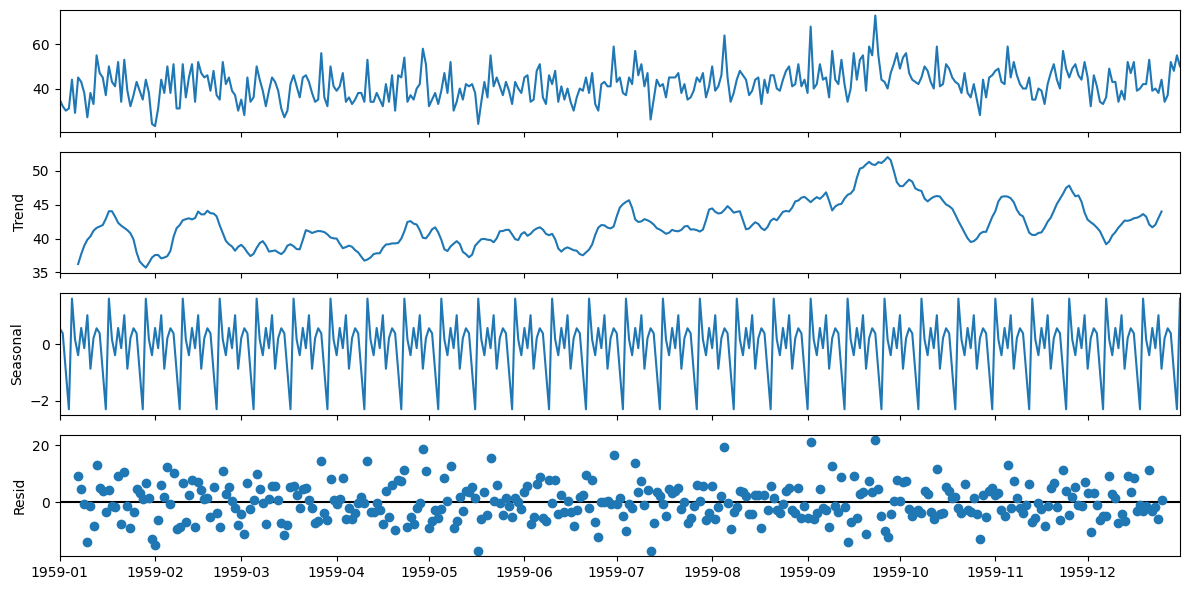

In [19]:
# Additive Decomposition
df1_add_decompose = seasonal_decompose(df1, model='additive', period=12)

fig = df1_add_decompose.plot()
fig.set_size_inches((12, 6))
fig.tight_layout()
plt.show()

In [20]:
df1_add_decompose.trend.head(10)

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03          NaN
1959-01-04          NaN
1959-01-05          NaN
1959-01-06          NaN
1959-01-07    36.250000
1959-01-08    37.708333
1959-01-09    38.958333
1959-01-10    39.833333
Name: trend, dtype: float64

In [21]:
df1_add_decompose.trend.tail(10)

Date
1959-12-22    41.666667
1959-12-23    42.041667
1959-12-24    43.041667
1959-12-25    44.000000
1959-12-26          NaN
1959-12-27          NaN
1959-12-28          NaN
1959-12-29          NaN
1959-12-30          NaN
1959-12-31          NaN
Name: trend, dtype: float64

#### Null values for top and bottom is because trend is calculated by averaging 6 months of data on either side. But for starting and ending values there would be not either side. So Null values. That's why it is also called moving average decomposition. 

In [22]:
df1_add_decompose.seasonal

Date
1959-01-01    0.575615
1959-01-02    0.397454
1959-01-03   -0.944500
1959-01-04   -2.308006
1959-01-05    1.633086
                ...   
1959-12-27    0.575615
1959-12-28    0.397454
1959-12-29   -0.944500
1959-12-30   -2.308006
1959-12-31    1.633086
Name: seasonal, Length: 365, dtype: float64

In [23]:
df1_add_decompose.resid.head(10)

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03          NaN
1959-01-04          NaN
1959-01-05          NaN
1959-01-06          NaN
1959-01-07     9.133198
1959-01-08     4.705420
1959-01-09    -0.825136
1959-01-10   -13.875136
Name: resid, dtype: float64

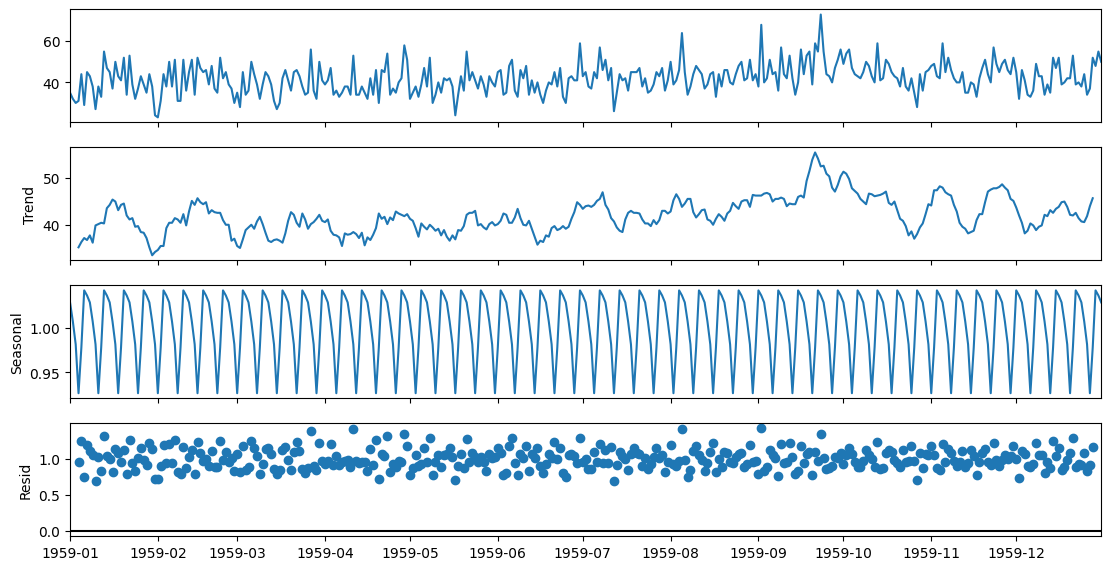

In [24]:
# Multiplicative Decomposition
df1_mul_decompose = seasonal_decompose(df1, model='multiplicative')

fig = df1_mul_decompose.plot()
fig.set_size_inches(12,6)
plt.show()

## Down Sampling

### Using AirPassenger Data,

In [25]:
# Changing the monthly series to Quaterly. Mean as aggregating function. This way we can downsize the dataset.
df_q = df.resample('Q').mean()

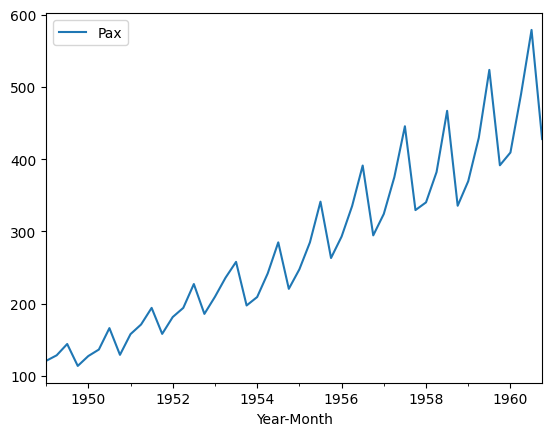

In [26]:
df_q.plot()
plt.show()

## Up Sampling

In [27]:
# Changing the monthly series to daily. Using Forward fill strategy, same data would be copied for a whole month of 30/31 days.
df_d = df.resample('D').ffill() 

In [28]:
df_d.loc['1949-01']

,Pax
Year-Month,
1949-01-01,112
1949-01-02,112
1949-01-03,112
1949-01-04,112
1949-01-05,112
1949-01-06,112
1949-01-07,112
1949-01-08,112
1949-01-09,112


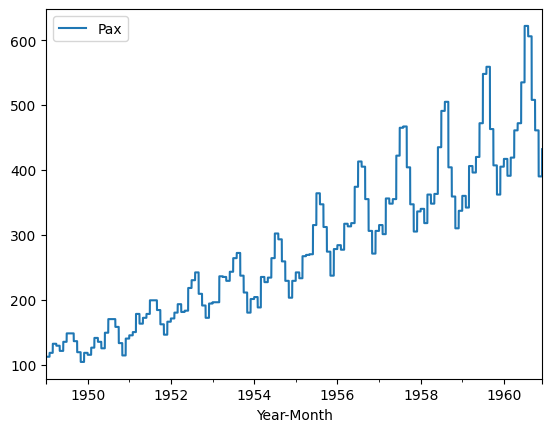

In [29]:
df_d.plot()
plt.show()

In [30]:
# Let's change the monthly series to hourly.
df_h = df.resample('H').interpolate()

In [31]:
df_h.loc['1949-01-01']

,Pax
Year-Month,
1949-01-01 00:00:00,112.000000
1949-01-01 01:00:00,112.008065
1949-01-01 02:00:00,112.016129
1949-01-01 03:00:00,112.024194
1949-01-01 04:00:00,112.032258
1949-01-01 05:00:00,112.040323
1949-01-01 06:00:00,112.048387
1949-01-01 07:00:00,112.056452
1949-01-01 08:00:00,112.064516


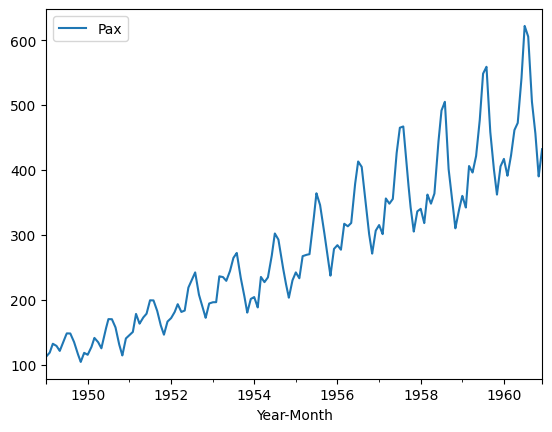

In [32]:
df_h.plot()
plt.show()